# 최적화 함수 (Optimizer)
- ✅ 최적화 함수(Optimizer)란?
- 💡 AI 모델이 예측을 잘하도록 "가중치를 조정"해주는 똑똑한 도구야!
- 즉, 모델이 틀리면 → 얼마나, 어떤 방향으로 가중치를 바꿔야 할지 알려주는 역할
- 🎯 왜 필요할까?
- 딥러닝 모델은 처음에는 가중치(W) 를 랜덤하게 설정해
- 예를 들어: 정답은 42인데, 모델은 8이라고 예측했어 그럼 “지금 틀렸으니까 이만큼 고쳐야 돼!” 라고 알려줘야지?

- 👉 그걸 "기울기(gradient)" 를 통해 계산하고,
- 👉 그 기울기를 얼마만큼, 어떻게 반영해서 가중치를 바꿀지 결정하는 게 바로 Optimizer야!

- ✅ 최적화의 전체 흐름 요약
- 모델이 예측을 함 → y_pred

- 정답 y와 비교해서 손실(loss) 계산

- 손실에 대한 기울기(gradient) 계산 → loss.backward()

- Optimizer가 기울기만큼 가중치를 업데이트 → optimizer.step()



In [43]:
import numpy as np
import matplotlib.pyplot as plt

### 간단한 SGD
- Stochastic Gradient Descent = 확률적 경사 하강법

In [44]:
data_sample = np.random.uniform(-2, 2, size=10)

def loss(x):
    return x**2

def gradient(x):
    return 2 * x

In [45]:
def sgd(lr=0.1, epochs=10):
    w = np.random.uniform(-2, 2)
    history = [w]

    for _ in range(epochs):
        sample = np.random.choice(data_sample)
        grad = gradient(sample)
        w -= lr * grad
        history.append(w)
        
    return history

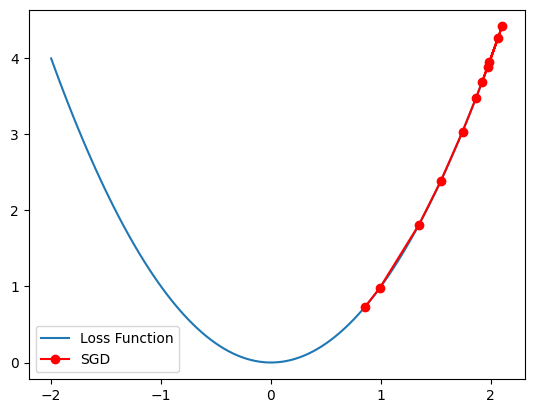

In [46]:
history = sgd()
x_vals = np.linspace(-2, 2, 100)
plt.plot(x_vals, loss(x_vals), label='Loss Function')
plt.plot(history, loss(np.array(history)), 'ro-', label='SGD')
plt.legend()
plt.show()

### 모멘텀 추가

In [47]:
def sgd_momentum(lr=0.1, momentum=0.9, epochs=10):
    w = np.random.uniform(-2, 2)
    v = 0
    history = [w]

    for _ in range(epochs):
        grad = gradient(w)
        v = momentum * v - lr * grad
        w += v
        
        history.append(w)

    return history

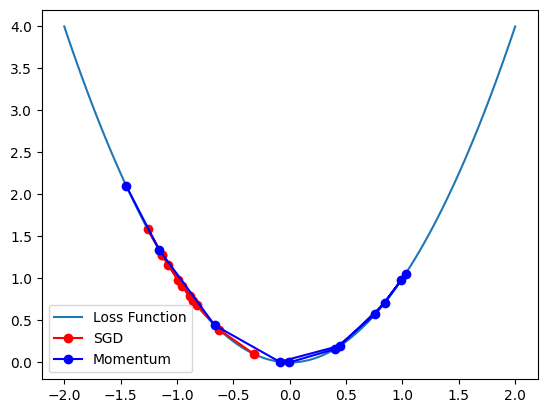

In [48]:
sgd_history = sgd()
momentum_history = sgd_momentum()

x_vals = np.linspace(-2, 2, 100)
plt.plot(x_vals, loss(x_vals), label='Loss Function')

plt.plot(sgd_history, loss(np.array(sgd_history)), 'ro-', label='SGD')
plt.plot(momentum_history, loss(np.array(momentum_history)), 'bo-', label='Momentum')
plt.legend()
plt.show()

### 학습률에 따른 SGD

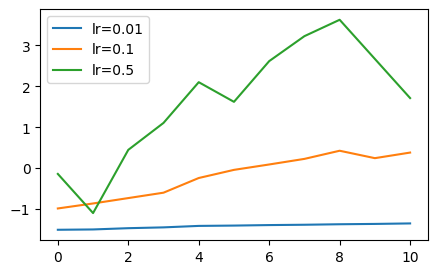

In [49]:
learning_rates = [0.01, 0.1, 0.5]
histories = [sgd(lr=lr) for lr in learning_rates]

plt.figure(figsize=(5, 3))
for i, history in enumerate(histories):
    plt.plot(history, label=f'lr={learning_rates[i]}')
plt.legend()
plt.show()

### AdaGrad

In [50]:
def adagrad(lr=0.1, epsilon=1e-8, epochs=10):
    w = np.random.uniform(-2, 2)
    h = 0
    history = [w]

    for _ in range(epochs):
        grad = gradient(w)
        h += grad ** 2
        w -= (lr / (np.sqrt(h) + epsilon)) * grad
        history.append(w)

    return history

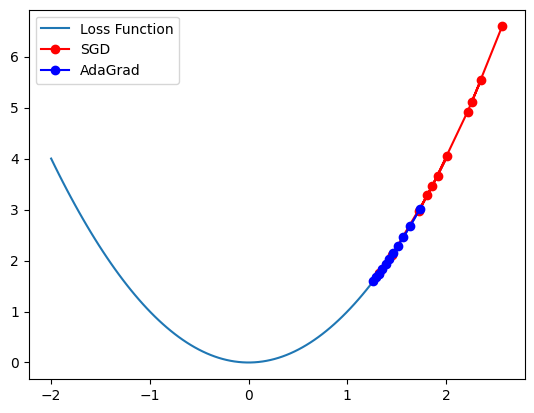

In [51]:
sgd_history = sgd()
adagrad_history = adagrad()

x_vals = np.linspace(-2, 2, 100)
plt.plot(x_vals, loss(x_vals), label='Loss Function')

plt.plot(sgd_history, loss(np.array(sgd_history)), 'ro-', label='SGD')
plt.plot(adagrad_history, loss(np.array(adagrad_history)), 'bo-', label='AdaGrad')
plt.legend()
plt.show()

### RMSprop

In [52]:
def rmsprop(lr=0.1, beta=0.9, epsilon=1e-8, epochs=10):
    w = np.random.uniform(-2, 2)
    h = 0
    history =[w]

    for _ in range(epochs):
        grad = gradient(w)
        h = beta * h + (1 - beta) * grad ** 2
        w -= (lr / (np.sqrt(h) + epsilon)) * grad
        history.append(w)

    return history

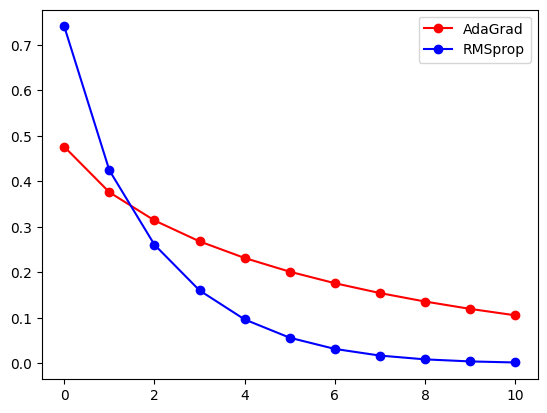

In [53]:
adagrad_history = adagrad()
rmsprop_history = rmsprop()

plt.plot(range(11), adagrad_history, 'ro-', label='AdaGrad')
plt.plot(range(11), rmsprop_history, 'bo-', label='RMSprop')
plt.legend()
plt.show()

### Adam

In [54]:
def adam(lr=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, epochs=10):
    w = np.random.uniform(-2, 2)
    m, v = 0, 0
    history = [w]

    for t in range(1, epochs+1):
        grad = gradient(w)

        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad ** 2
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        w -= (lr / (np.sqrt(v_hat) + epsilon)) * m_hat
        history.append(w)

    return history 

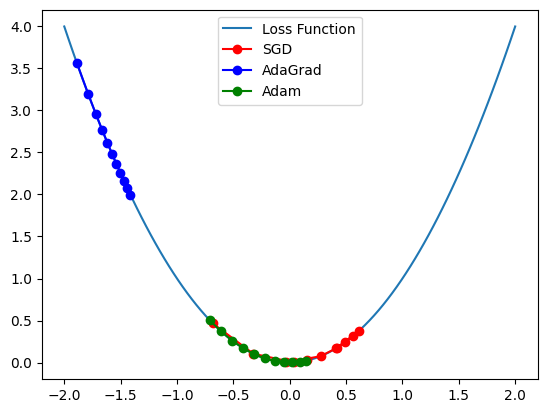

In [55]:
sgd_history = sgd()
adagrad_history = adagrad()
adam_history = adam()

x_vals = np.linspace(-2, 2, 100)
plt.plot(x_vals, loss(x_vals), label='Loss Function')

plt.plot(sgd_history, loss(np.array(sgd_history)), 'ro-', label='SGD')
plt.plot(adagrad_history, loss(np.array(adagrad_history)), 'bo-', label='AdaGrad')
plt.plot(adam_history, loss(np.array(adam_history)), 'go-', label='Adam')

plt.legend()
plt.show()

### PyTorch 활용 -> SGD vs Adam 비교

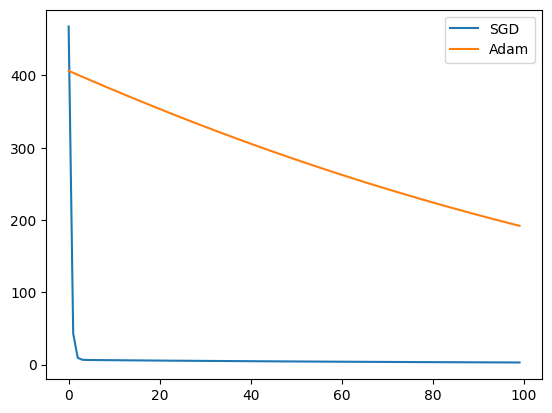

In [56]:
import torch
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(42)
X = torch.rand(100, 1) * 10
y = 3 * X + 5 + torch.randn(100, 1)

model_sgd = nn.Linear(1, 1)
model_adam = nn.Linear(1, 1)

criterion = nn.MSELoss()
optim_sgd = optim.SGD(model_sgd.parameters(), lr=0.01)
optim_adam = optim.Adam(model_adam.parameters(), lr=0.01)

epochs = 100
losses_sgd = []
losses_adam = []

for epoch in range(epochs):
    optim_sgd.zero_grad()
    outputs = model_sgd(X)
    loss = criterion(outputs, y)
    loss.backward()
    optim_sgd.step()
    losses_sgd.append(loss.item())

for epoch in range(epochs):
    optim_adam.zero_grad()
    outputs = model_adam(X)
    loss = criterion(outputs, y)
    loss.backward()
    optim_adam.step()
    losses_adam.append(loss.item())

plt.plot(losses_sgd, label='SGD')
plt.plot(losses_adam, label='Adam')
plt.legend()
plt.show()